In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [18]:
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df.sample(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
2,4.7,3.2,1.3,0.2,0,setosa
71,6.1,2.8,4.0,1.3,1,versicolor


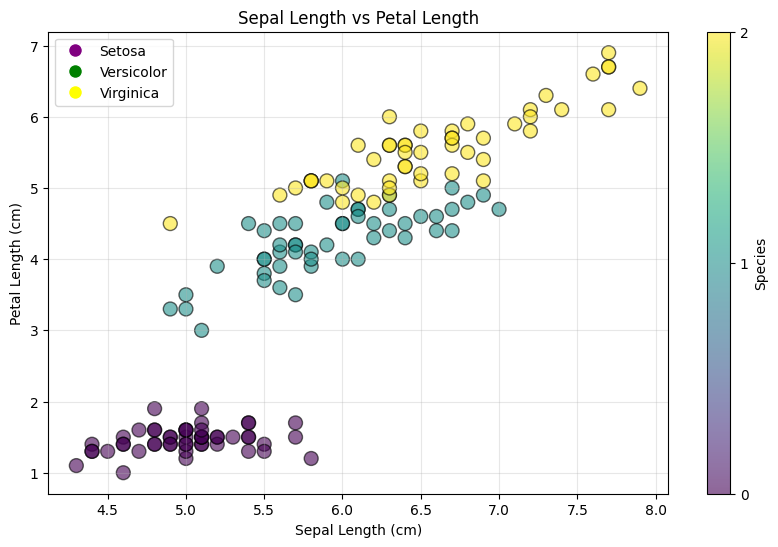

In [23]:
# Scatter plot of sepal length vs petal length
plt.figure(figsize=(10, 6))
plt.scatter(df['sepal length (cm)'], df['petal length (cm)'], c=df['target'], cmap='viridis', alpha=0.6, edgecolors='black', s=100)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Sepal Length vs Petal Length')
plt.colorbar(label='Species', ticks=[0, 1, 2])
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='Setosa'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Versicolor'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='Virginica')
])
plt.grid(True, alpha=0.3)
plt.show()

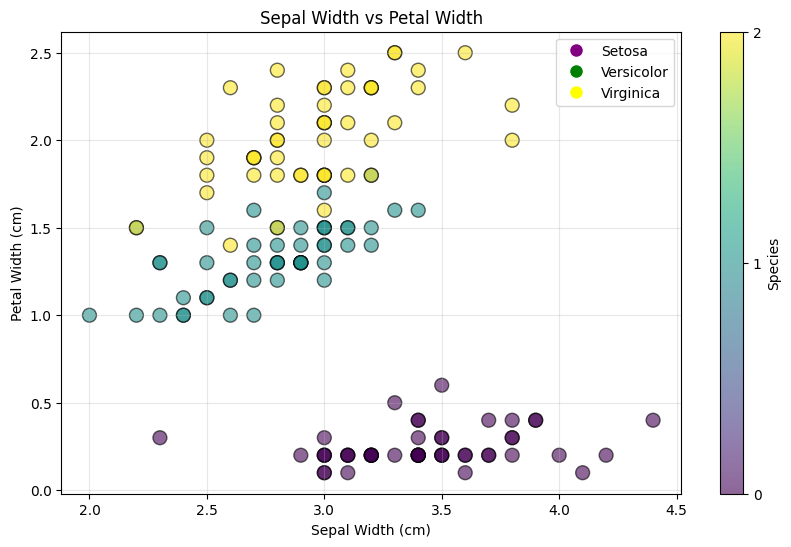

In [24]:
# Scatter plot of sepal width vs petal width
plt.figure(figsize=(10, 6))
plt.scatter(df['sepal width (cm)'], df['petal width (cm)'], c=df['target'], cmap='viridis', alpha=0.6, edgecolors='black', s=100)
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Sepal Width vs Petal Width')
plt.colorbar(label='Species', ticks=[0, 1, 2])
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='Setosa'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Versicolor'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='Virginica')
])
plt.grid(True, alpha=0.3)
plt.show()

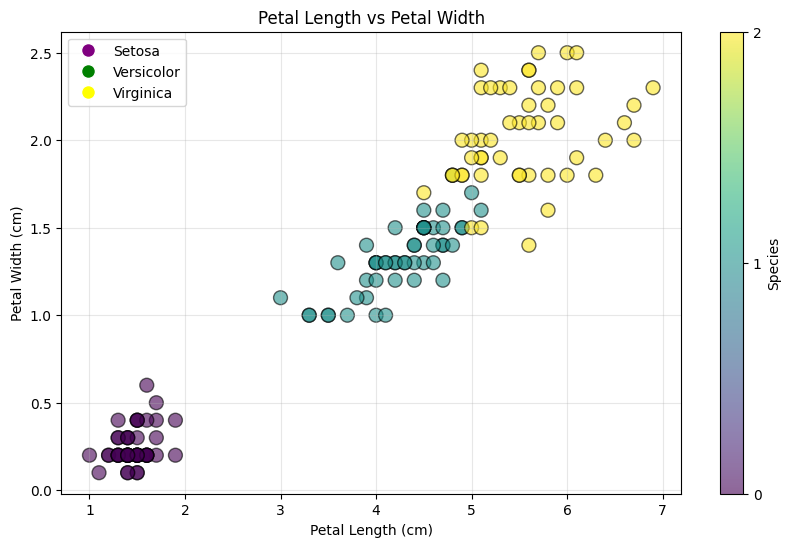

In [ ]:
# Scatter plot of petal length vs petal width
plt.figure(figsize=(10, 6))
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['target'], cmap='viridis', alpha=0.6, edgecolors='black', s=100)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')
plt.colorbar(label='Species', ticks=[0, 1, 2])
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='Setosa'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Versicolor'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='Virginica')
])
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
#petal length < 2 and petal width < 0.5 are Setosa || sepal length/width ratio less than 1.75
#versicolor in petal length >= 3 < 4.75 and petal width > 0.9 to < 1.6
#virginica in petal length >= 4.75 and petal width >= 1.6 || petal width > 1.6 || petal lenght > 4.5

Rule-Based Classifier Accuracy: 0.9067 (90.67%)

Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        50
  Versicolor       1.00      0.72      0.84        50
   Virginica       0.78      1.00      0.88        50

    accuracy                           0.91       150
   macro avg       0.93      0.91      0.90       150
weighted avg       0.93      0.91      0.90       150


Confusion Matrix:
[[50  0  0]
 [ 0 36 14]
 [ 0  0 50]]


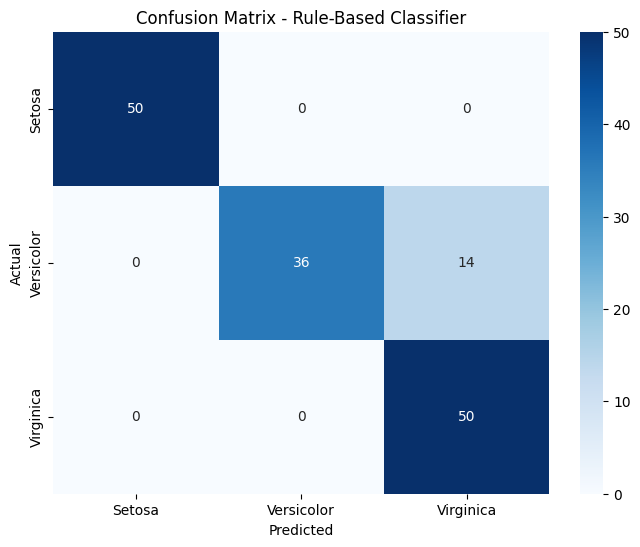


Misclassified samples: 14
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
50                7.0               3.2                4.7               1.4   
52                6.9               3.1                4.9               1.5   
54                6.5               2.8                4.6               1.5   
56                6.3               3.3                4.7               1.6   
58                6.6               2.9                4.6               1.3   
63                6.1               2.9                4.7               1.4   
70                5.9               3.2                4.8               1.8   
72                6.3               2.5                4.9               1.5   
73                6.1               2.8                4.7               1.2   
76                6.8               2.8                4.8               1.4   
77                6.7               3.0                5.0               1.7   
83           

In [27]:
# Rule-based classification based on manual analysis
def rule_based_classifier(row):
    petal_length = row['petal length (cm)']
    petal_width = row['petal width (cm)']
    sepal_ratio = row['sepal_ratio']
    
    # Setosa rules
    if (petal_length < 2 and petal_width < 0.5) or (sepal_ratio < 1.75):
        return 0  # Setosa
    
    # Virginica rules (check before Versicolor)
    if petal_length >= 4.75 or petal_width > 1.6 or petal_length > 4.5:
        return 2  # Virginica
    
    # Versicolor rules
    if (petal_length >= 3 and petal_length < 4.75) and (petal_width > 0.9 and petal_width < 1.6):
        return 1  # Versicolor
    
    # Default to Versicolor for edge cases
    return 1

# Apply rule-based classification
df['rule_based_prediction'] = df.apply(rule_based_classifier, axis=1)

# Calculate accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(df['target'], df['rule_based_prediction'])
print(f"Rule-Based Classifier Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print()

# Detailed classification report
print("Classification Report:")
print(classification_report(df['target'], df['rule_based_prediction'], 
                          target_names=['Setosa', 'Versicolor', 'Virginica']))

# Confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(df['target'], df['rule_based_prediction'])
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Rule-Based Classifier')
plt.show()

# Show misclassified samples
misclassified = df[df['target'] != df['rule_based_prediction']]
if len(misclassified) > 0:
    print(f"\nMisclassified samples: {len(misclassified)}")
    print(misclassified[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 
                         'petal width (cm)', 'target', 'rule_based_prediction', 'species']])
else:
    print("\nNo misclassified samples! Perfect accuracy!")

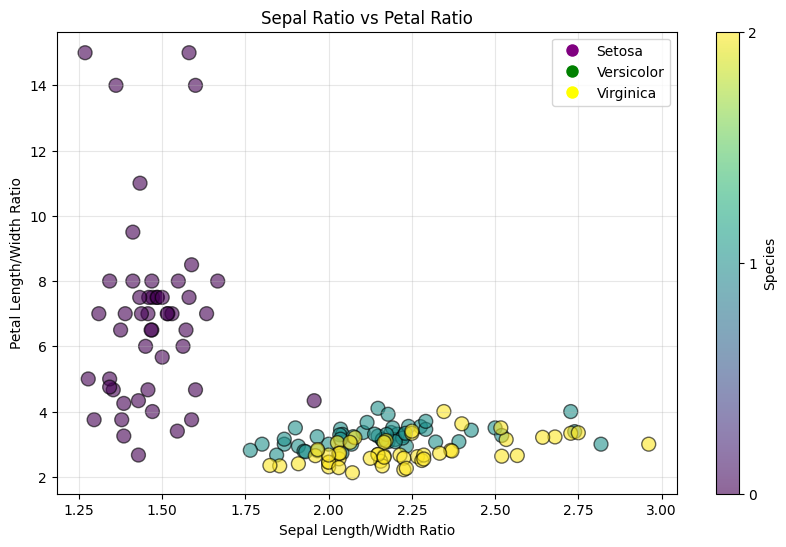

In [22]:
# Calculate ratios
df['sepal_ratio'] = df['sepal length (cm)'] / df['sepal width (cm)']
df['petal_ratio'] = df['petal length (cm)'] / df['petal width (cm)']

# Scatter plot of sepal ratio vs petal ratio
plt.figure(figsize=(10, 6))
plt.scatter(df['sepal_ratio'], df['petal_ratio'], c=df['target'], cmap='viridis', alpha=0.6, edgecolors='black', s=100)
plt.xlabel('Sepal Length/Width Ratio')
plt.ylabel('Petal Length/Width Ratio')
plt.title('Sepal Ratio vs Petal Ratio')
plt.colorbar(label='Species', ticks=[0, 1, 2])
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='Setosa'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Versicolor'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='Virginica')
])
plt.grid(True, alpha=0.3)
plt.show()

Logistic Regression: 1.0000
Decision Tree: 1.0000
Random Forest: 1.0000
K-Nearest Neighbors: 1.0000
Support Vector Machine: 1.0000
Naive Bayes: 1.0000


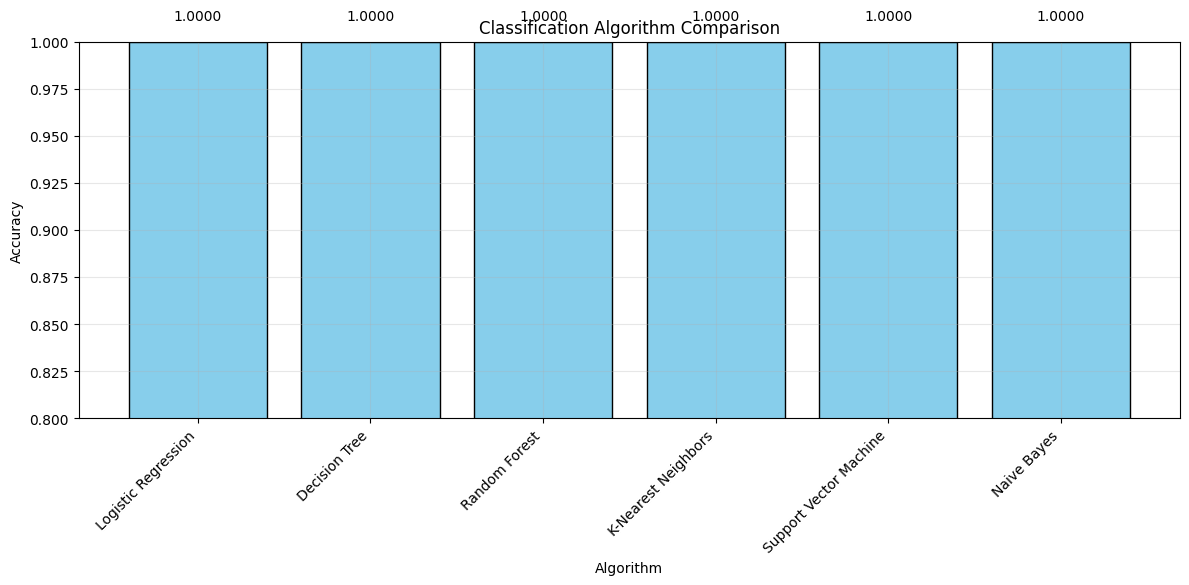

In [25]:
# Compare multiple classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Prepare data
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name}: {accuracy:.4f}")

# Visualize results
plt.figure(figsize=(12, 6))
plt.bar(results.keys(), results.values(), color='skyblue', edgecolor='black')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Classification Algorithm Comparison')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.8, 1.0)
plt.grid(True, alpha=0.3)
for i, (name, acc) in enumerate(results.items()):
    plt.text(i, acc + 0.01, f'{acc:.4f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [26]:
# Check for overfitting using cross-validation
from sklearn.model_selection import cross_val_score

print("Cross-Validation Results (5-fold):")
print("=" * 50)

for name, clf in classifiers.items():
    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(clf, X, y, cv=5)
    
    print(f"{name}:")
    print(f"  CV Scores: {cv_scores}")
    print(f"  Mean: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print()

# Check training vs test accuracy
print("\n" + "=" * 50)
print("Training vs Test Accuracy:")
print("=" * 50)

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    train_acc = clf.score(X_train, y_train)
    test_acc = clf.score(X_test, y_test)
    
    print(f"{name}:")
    print(f"  Training Accuracy: {train_acc:.4f}")
    print(f"  Test Accuracy: {test_acc:.4f}")
    print(f"  Difference: {abs(train_acc - test_acc):.4f}")
    print()

Cross-Validation Results (5-fold):
Logistic Regression:
  CV Scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
  Mean: 0.9733 (+/- 0.0499)

Decision Tree:
  CV Scores: [0.96666667 0.96666667 0.9        0.96666667 1.        ]
  Mean: 0.9600 (+/- 0.0653)

Random Forest:
  CV Scores: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
  Mean: 0.9600 (+/- 0.0499)

K-Nearest Neighbors:
  CV Scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
  Mean: 0.9733 (+/- 0.0499)

Support Vector Machine:
  CV Scores: [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
  Mean: 0.9667 (+/- 0.0422)

Naive Bayes:
  CV Scores: [0.93333333 0.96666667 0.93333333 0.93333333 1.        ]
  Mean: 0.9533 (+/- 0.0533)


Training vs Test Accuracy:
Logistic Regression:
  Training Accuracy: 0.9750
  Test Accuracy: 1.0000
  Difference: 0.0250

Decision Tree:
  Training Accuracy: 1.0000
  Test Accuracy: 1.0000
  Difference: 0.0000

Random Forest:
  Training Accuracy: 1.0000
  Test 